<a href="https://colab.research.google.com/github/Utterbackian/Neuromatch2023_Medical_Imaging/blob/main/Loading%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import shutil

In [2]:
path = "eeg_5_95_std.pth"
loaded_object = torch.load(path) 

In [3]:
loaded_object["dataset"][:10]

[{'eeg': tensor([[-0.0098,  0.0195,  0.0620,  ...,  0.0638,  0.0120, -0.0118],
          [-0.0045,  0.1303,  0.2673,  ...,  0.0894,  0.0342, -0.0082],
          [ 0.0215, -0.2017, -0.4305,  ..., -0.2022, -0.0940,  0.0188],
          ...,
          [ 0.0160,  0.0707,  0.1005,  ...,  0.2066,  0.1156,  0.0036],
          [-0.0046, -0.0084, -0.0119,  ...,  0.0007, -0.0026, -0.0053],
          [ 0.0040,  0.0419,  0.0665,  ...,  0.0765,  0.0309, -0.0063]]),
  'image': 0,
  'label': 10,
  'subject': 4},
 {'eeg': tensor([[-0.0120,  0.0473,  0.1264,  ...,  0.0109,  0.0188,  0.0211],
          [-0.0061,  0.0061,  0.0379,  ...,  0.0466,  0.0355,  0.0135],
          [ 0.0016,  0.0690,  0.1212,  ...,  0.0077, -0.0025,  0.0047],
          ...,
          [ 0.0189,  0.0461,  0.0376,  ..., -0.0657, -0.0639, -0.0245],
          [-0.0043,  0.0026,  0.0072,  ..., -0.0171, -0.0132, -0.0064],
          [ 0.0073,  0.1099,  0.1803,  ..., -0.1500, -0.1019, -0.0184]]),
  'image': 1,
  'label': 30,
  'subject': 

## Class Indices

In [ ]:
"""ids = loaded_object["images"]

# Filter the IDs that start with "112"
matching_ids = [id[id.rfind("_"):] for id in ids if id.startswith("n02106662")]

# Print the matching IDs
print(matching_ids)"""

## Indexing

In [4]:
def indexing(field):
    idx_dict = {}
    for i, image in enumerate(loaded_object[field]):
        idx_dict[i] = image
    return idx_dict

In [5]:
for EEG in loaded_object['dataset']:
    indexed_labels = indexing("labels")
    indexed_images = indexing("images")
    EEG['image'] = indexed_images[EEG['image']]
    EEG['label'] = indexed_labels[EEG['label']]

In [6]:
loaded_object["dataset"]

[{'eeg': tensor([[-0.0098,  0.0195,  0.0620,  ...,  0.0638,  0.0120, -0.0118],
          [-0.0045,  0.1303,  0.2673,  ...,  0.0894,  0.0342, -0.0082],
          [ 0.0215, -0.2017, -0.4305,  ..., -0.2022, -0.0940,  0.0188],
          ...,
          [ 0.0160,  0.0707,  0.1005,  ...,  0.2066,  0.1156,  0.0036],
          [-0.0046, -0.0084, -0.0119,  ...,  0.0007, -0.0026, -0.0053],
          [ 0.0040,  0.0419,  0.0665,  ...,  0.0765,  0.0309, -0.0063]]),
  'image': 'n02951358_31190',
  'label': 'n02951358',
  'subject': 4},
 {'eeg': tensor([[-0.0120,  0.0473,  0.1264,  ...,  0.0109,  0.0188,  0.0211],
          [-0.0061,  0.0061,  0.0379,  ...,  0.0466,  0.0355,  0.0135],
          [ 0.0016,  0.0690,  0.1212,  ...,  0.0077, -0.0025,  0.0047],
          ...,
          [ 0.0189,  0.0461,  0.0376,  ..., -0.0657, -0.0639, -0.0245],
          [-0.0043,  0.0026,  0.0072,  ..., -0.0171, -0.0132, -0.0064],
          [ 0.0073,  0.1099,  0.1803,  ..., -0.1500, -0.1019, -0.0184]]),
  'image': 'n0345

## Replace

In [ ]:
"""# Define the folder path
folder_path = "./n02106662"
# Loop over the files in the folder
for filename in os.listdir(folder_path):
    # Extract the index from the filename
    index = filename.split("_")[-1].split(".")[0]
    # Construct the new filename
    new_filename = f"_{index}.jpg"
    # Construct the source and destination paths
    source_path = os.path.join(folder_path, filename)
    destination_path = os.path.join(folder_path, new_filename)
    # Check if the destination file already exists
    if os.path.exists(destination_path):
        print(f"Skipping {filename}: {destination_path} already exists.")
    else:
        # Rename the file
        os.rename(source_path, destination_path)"""

## Images Filtering

In [13]:
def filtering(source_folder, destination_folder, indices):
    found_counter = 0
    not_found_counter = 0

    for index in indices:
        class_label = index.split('_')[0]
        
        filename = f"{index}_{class_label}.JPEG"
        new_filename = f"{index}.JPEG"

        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, new_filename)
        
        if os.path.exists(source_path):
            
            shutil.move(source_path, destination_path)
            found_counter += 1
            
        else:
            not_found_counter += 1

    return f"images moved: {found_counter}, images not found: {not_found_counter}"

In [14]:
filtering("./images", "./filtered", loaded_object["images"])

'images moved: 390, images not found: 1606'

In [ ]:
for i, EEG in enumerate(loaded_object['dataset'][:10]):
    eeg_tensor = EEG['eeg']
    image = EEG['image']
    label = EEG['label']
    subject = EEG['subject']

    plt.plot(eeg_tensor[0])
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f'EEG Diagram {i}, Image: {image}, Label: {label}, Subject: {subject}')
    plt.show()

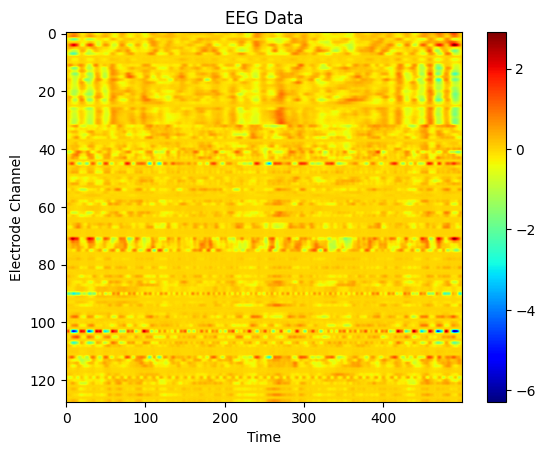

In [ ]:
eeg_data = loaded_object['dataset'][0]['eeg']
plt.imshow(eeg_data, aspect='auto', cmap='jet')
plt.colorbar()  # Optional: Include a colorbar for reference
plt.xlabel('Time')
plt.ylabel('Electrode Channel')
plt.title('EEG Data')
plt.show()